## Load the data from the csv files

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path_emnist = "/home/apil/Downloads/emnist"
train_db = pd.read_csv(path_emnist+"/emnist-balanced-train.csv",header=None)
test_db = pd.read_csv(path_emnist+"/emnist-balanced-train.csv",header=None)

## Grab the classes

In [2]:
y_train = train_db.iloc[:,0]

## Grab the training image

In [3]:
x_train= train_db.iloc[:,1:]

In [4]:
x_train = x_train.astype('float32')

In [16]:
import matplotlib.pyplot as plt
import cv2
transformer = ImageTransform()
def getImage(index):
    grey_img = x_train.values[index].reshape(28,28)
    grey_img [grey_img < 170] = 0.0
    grey_img [grey_img > 0 ] = 255
    colr_image = transformer.correctImage(cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR))
    return colr_image

### Save the images on file after rotation/reflection. Also save labels to CSV file

In [5]:
y_train_list = []
img_name_list = []

In [6]:
EMNIST_PATH = "/home/apil/work/emnist"


In [7]:
import sys
sys.path.append("..")
from fastai_imports import *

In [8]:
from fastai.paperpy.ImageTransform import *
from fastai.paperpy.dict_generator import *

In [9]:
def processImage():
    from tqdm import tqdm
    transformer = ImageTransform()
    
    for index,row in tqdm(x_train.iterrows()):
        grey_img = row.values.reshape(28,28)
        grey_img [grey_img < 170] = 0.0
        grey_img [grey_img > 0 ] = 255
        colr_image = cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR)
        img_name = "emnist_img_"+str(index)+".jpg"
        img_corr = transformer.correctImage(colr_image)
        #cv2.imwrite(EMNIST_PATH + "/train/" + img_name, img_corr)
        y_train_list.append(int(y_train.values[index]))
        img_name_list.append(img_name)

In [10]:
processImage()

112800it [00:14, 7928.74it/s]


In [11]:
# write to a dataframe, and then to csv
df = pd.DataFrame({'img_name':img_name_list, 'clazz':y_train_list})
df.to_csv(EMNIST_PATH+"/train.csv", header=False, index=False, columns=['img_name','clazz'])

### Look at some of the images
These were done prior to the transformation. You can see that images needs to be reoriented

In [12]:
classToChar, charToClass = DictGenerator.getDicts()

In [31]:
imageIndexesForClass = []
for i in range(47):
    tmp = np.where(y_train.values == i)
    imageIndexesForClass.append(np.random.choice(tmp[0],12))

In [41]:
ef getImagesWithTitles(idxs):
    imgs = np.stack([getImage(x) for x in idxs])
    titles = [y_train_list[i] for i in idxs]
    return imgs, titles

In [70]:
from fastai.paperpy.graphics import *

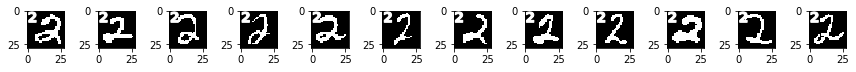

In [71]:
plotImageAndTitleArrays(imgs,titles)

/home/apil/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


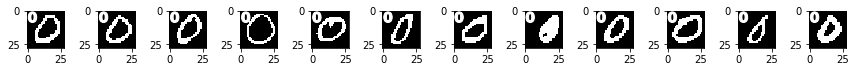

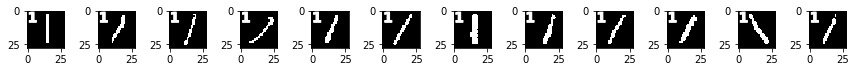

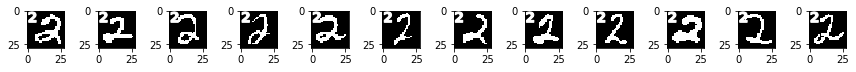

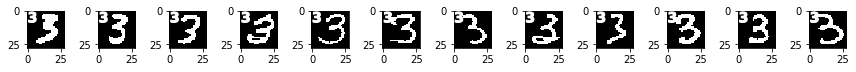

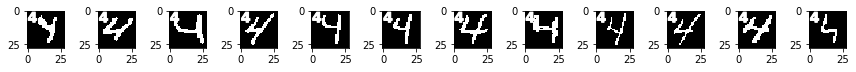

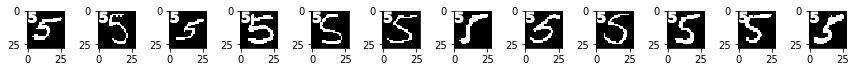

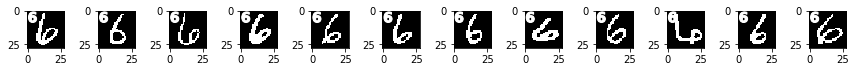

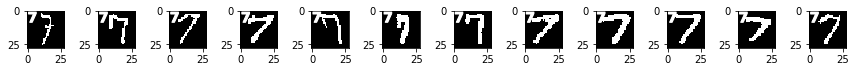

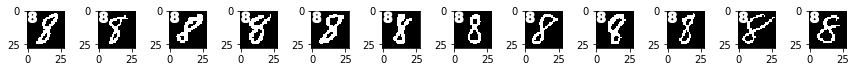

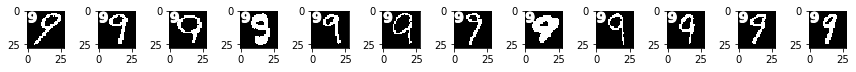

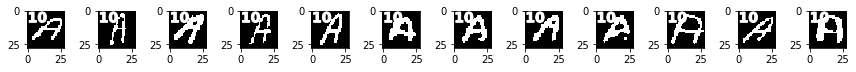

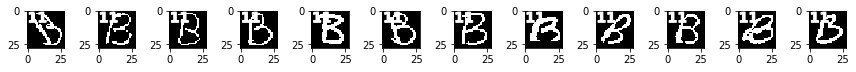

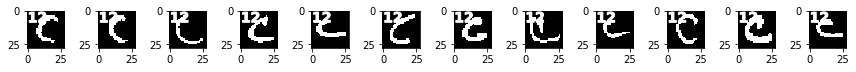

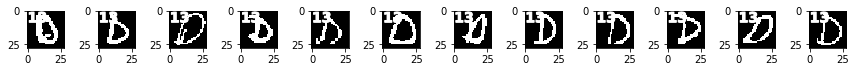

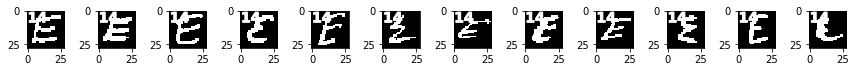

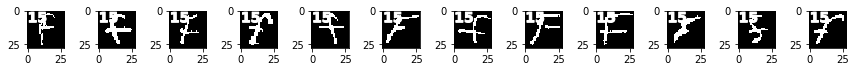

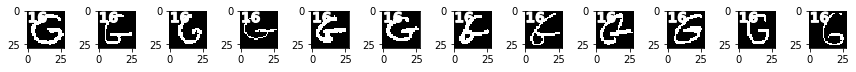

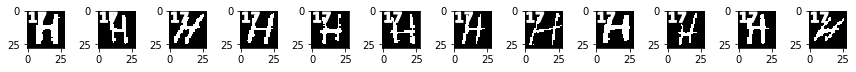

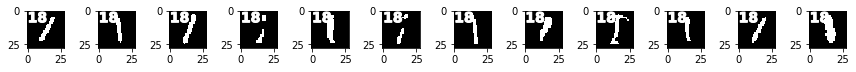

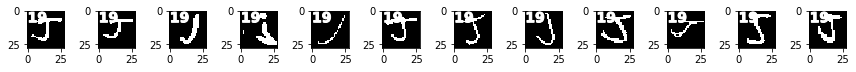

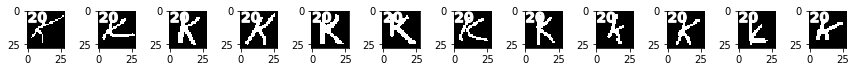

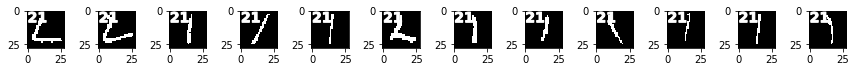

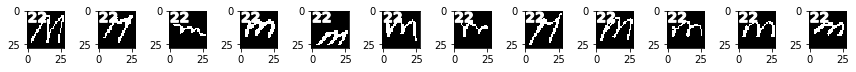

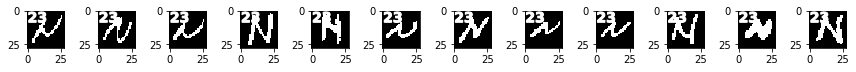

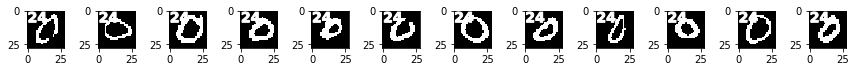

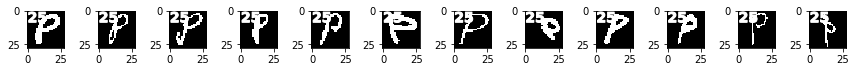

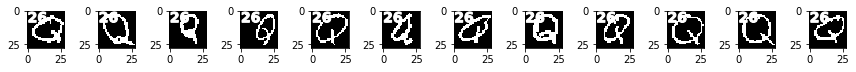

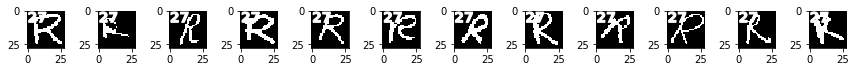

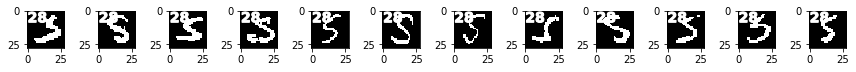

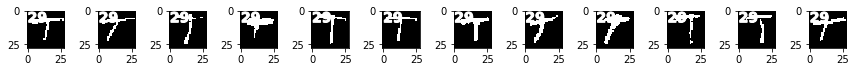

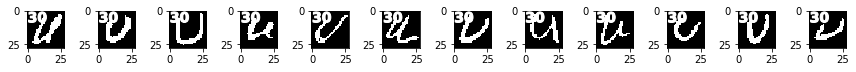

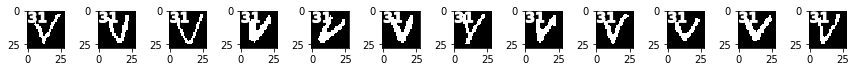

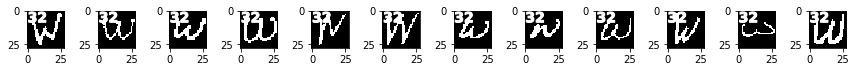

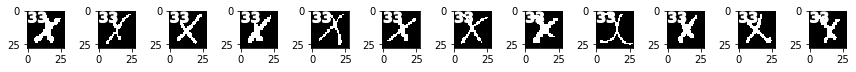

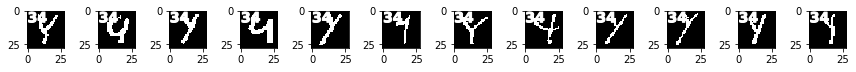

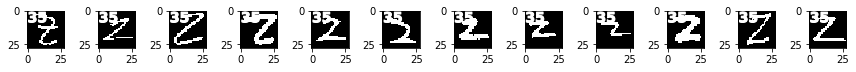

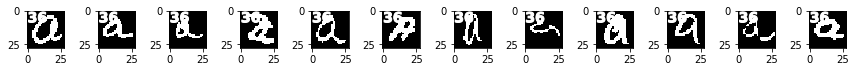

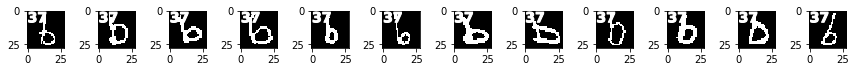

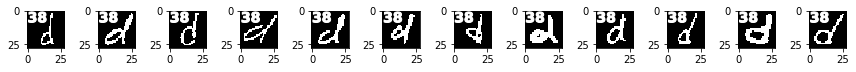

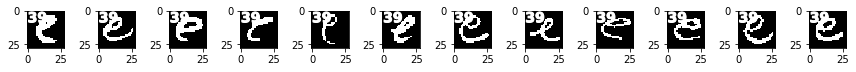

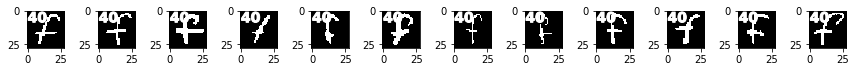

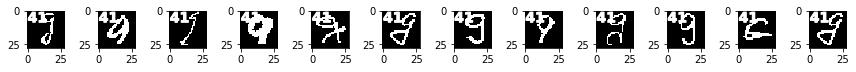

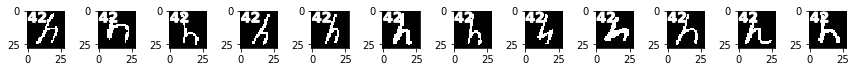

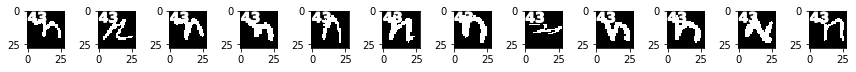

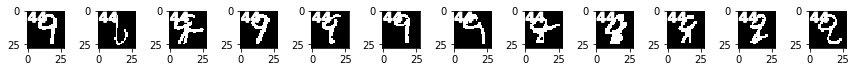

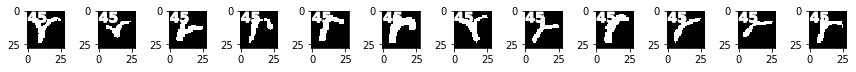

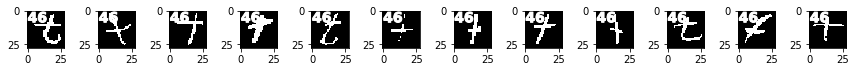

In [74]:
for i in range(47):
    imgs,titles = getImagesWithTitles(imageIndexesForClass[i])
    plotImageAndTitleArrays(imgs,titles)